In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [60]:
titanic = pd.read_excel("titanic.xls")
df = titanic
titanic
#passengerID
# Survived - did the passenger survived
# Pclass - passenger class
# Name (Master is boy, too young to be called Mister)
# Sex
# Age
# Sibsp - number of siblings and/or spouse on board
# Parch - number of parents/children on board
# Fare - ticket fare
# Cabin - room number
# Embarked - the port the passenger embarked from

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### 1. How is age distributed in every pclass and in every age?

##### Age distribution in each pclass (passanger class)

Text(0.5, 1.0, 'Age Distribution For Every Passanger Class')

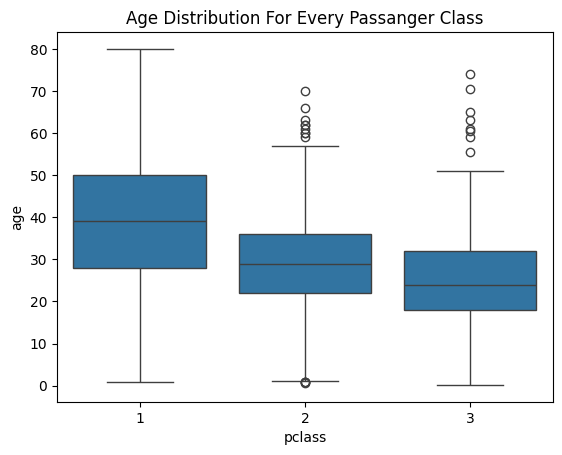

In [61]:
sns.boxplot(x="pclass",y="age",data=df).set_title("Age Distribution For Every Passanger Class")

### 2. Which family had lost the most members?

##### seperate names for easier access


In [62]:
family_names = df["name"].apply(lambda name: name.split(",")[0].strip())
prefixes = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[0].strip())
first_names = df["name"].apply(lambda name: (name.split(",")[1]).split(".")[1].strip())
df["first_name"] = first_names
df["last_name"] = family_names
df["prefix"] = prefixes


In [63]:
# assuming families had the same tickets and family names

df["died"] = df["survived"].apply(lambda survived: 1-survived)
families_deaths = df[["ticket","last_name","died"]].groupby(["ticket","last_name"]).sum()
max_deaths = families_deaths.died.max()
families_most_deaths = families_deaths[families_deaths["died"] == max_deaths]
# families_deaths.plot()
print(families_most_deaths)


                    died
ticket   last_name      
CA. 2343 Sage         11


##### Check family size to survival rate 

In [127]:

num_family_members = df[["ticket","last_name","age"]].groupby(["ticket","last_name"]).count().reset_index()
nfm = num_family_members
df["num_fam_members"] = df["boat"] # placeholder
# df
# for index, row in df.iterrows():
    # df.loc[index, "num_fam_members"] = nfm[(nfm["ticket"] == row["ticket"]) & (nfm["last_name"] == row["last_name"])]['age']
    # print(df.loc[index, "num_fam_members"])
    # print(nfm[(nfm["ticket"] == row["ticket"]) & (nfm["last_name"] == row["last_name"])]['age'])
# df

In [135]:
df[["ticket","last_name"]].applymap(lambda x: "ron")

,ticket,last_name
0,ron,ron
1,ron,ron
2,ron,ron
3,ron,ron
4,ron,ron
...,...,...
1304,ron,ron
1305,ron,ron
1306,ron,ron
1307,ron,ron


##### Check number of children/parents on board to survival rate

### 3.Is there a connection between the age of a passenger and it's chance of survival? What about his pclass?

In [ ]:
# Chceck connection between age and pclass to survival
# Check connection between age and sex to survival
rounded_age = df["age"].fillna(value=-10).apply(int) # rounding and making all NaN to be -10 (in order to ignore NaN)
survived = df["survived"].apply(bool)

Text(0.5, 1.0, 'Age Distribution Between Survivors and Dead')

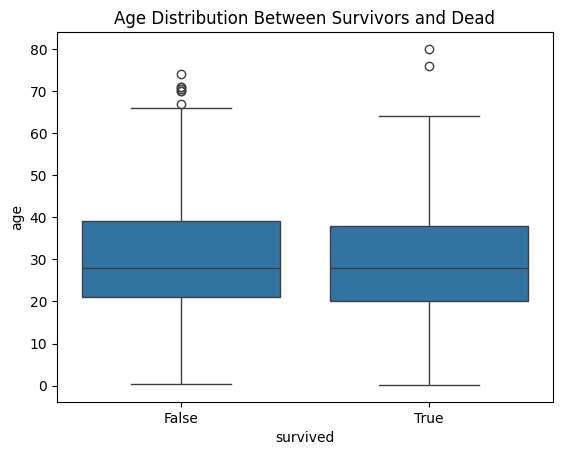

In [ ]:
sns.boxplot(x=df["survived"].apply(bool), y="age", data=df).set_title("Age Distribution Between Survivors and Dead")

##### Check survival distribution across ages and pclass


Text(0.5, 0, 'Age')

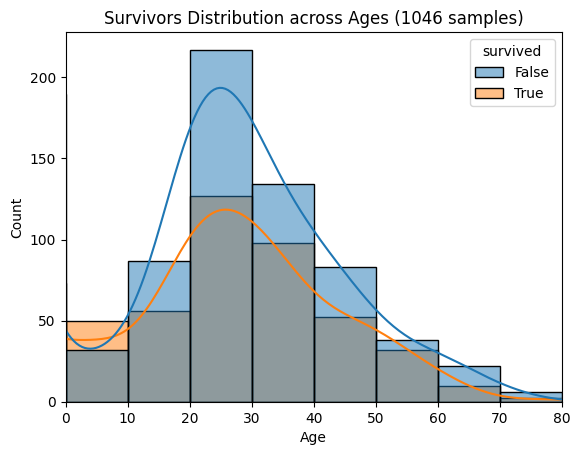

In [ ]:

plot = sns.histplot(data=df, x=rounded_age ,hue=survived, kde=True, binwidth=10)
plot.set_title(f"Survivors Distribution across Ages ({len(rounded_age[rounded_age>-1])} samples)")
plot.set_xlim(0, rounded_age.max())
plot.set_xlabel("Age")
# plt.legend(title="Survived", loc="upper right", labels=["Nah Bruh Dead","Hell Yeah"])

Text(0.5, 1.0, 'Survial Rate by Age Groups')

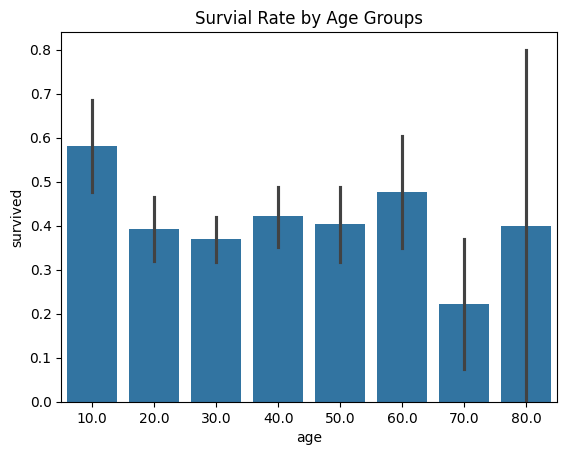

In [ ]:
# Want a survivor rate by age but in bins....
def round_to_nearest_ten(x):
    if x==0: return 10
    return math.ceil(x/10.0)*10
rounded_age_grouped = rounded_age.apply(round_to_nearest_ten)

plot = sns.barplot(x=rounded_age_grouped[rounded_age_grouped>=0],y="survived",data=df )
plot.set_title("Survial Rate by Age Groups")
# plot.set_xlim(0.5)






Text(0.5, 1.0, 'Survivors Distribution across PClass')

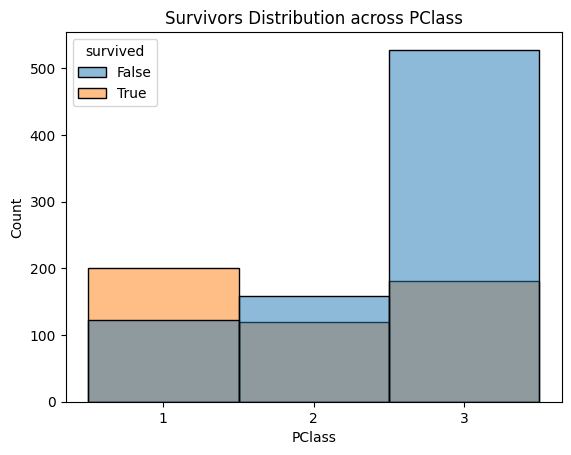

In [ ]:
plot = sns.histplot(x=df.pclass.apply(str), hue=df.survived.apply(bool),data=df)
plot.set_xlabel("PClass")
plot.set_title("Survivors Distribution across PClass")

Text(0.5, 1.0, 'Survival Rate for PClass')

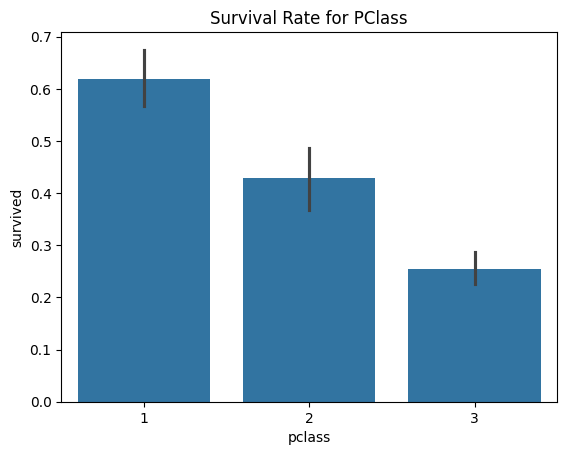

In [ ]:
plot = sns.barplot(data=df,x="pclass",y=survived, )
plot.set_title("Survival Rate for PClass")

##### Relation between age, pclass and survival

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,first_name,last_name,prefix,died
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Hudson Trevor,Allison,Master,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Helen Loraine,Allison,Miss,1
94,1,1,"Dodge, Master. Washington",male,4.0000,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Washington,Dodge,Master,0
273,1,1,"Spedden, Master. Robert Douglas",male,6.0000,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Robert Douglas,Spedden,Master,0
339,2,1,"Becker, Master. Richard F",male,1.0000,2,1,230136,39.0000,F4,S,11,NaN,"Guntur, India / Benton Harbour, MI",Richard F,Becker,Master,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,3,0,"Strom, Miss. Telma Matilda",female,2.0000,0,1,347054,10.4625,G6,S,NaN,NaN,NaN,Telma Matilda,Strom,Miss,1
1240,3,1,"Thomas, Master. Assad Alexander",male,0.4167,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Assad Alexander,Thomas,Master,0
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Georges Youssef,Touma,Master,0
1257,3,1,"Touma, Miss. Maria Youssef",female,9.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Maria Youssef,Touma,Miss,0


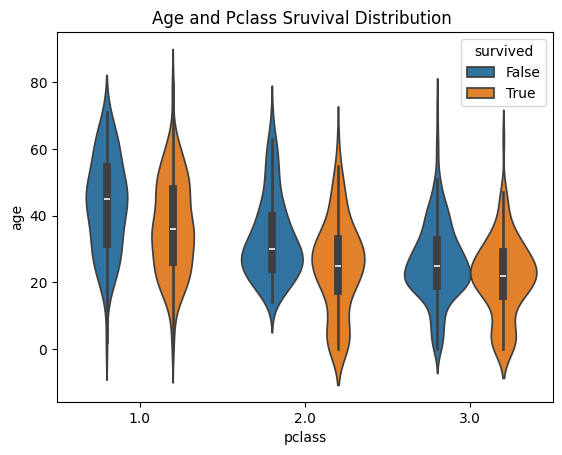

In [ ]:
df_only_with_age = df[df["age"] >= 0]
sns.violinplot(data=df_only_with_age, y=rounded_age, x="pclass",hue=survived).set_title("Age and Pclass Sruvival Distribution ")